# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Refanda Surya Saputra
- **Email:** refandasuryasaputra@gmail.com
- **ID Dicoding:** refan_surya

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda dari tahun 2011 hingga 2012?
- Apakah jumlah peminjam sepeda bertambah pada hari libur nasional atau akhir pekan dibandingkan dengan hari kerja?
- Bagaimana kondisi cuaca yang lebih disukai oleh pesepeda?
- Apakah musim panas menjadi musim dengan jumlah peminjam sepeda terbanyak?
- Apakah jumlah penyewa sepeda yang terdaftar lebih banyak dari penyewa kasual?
- Apakah sore hari merupakan waktu yang cocok untuk bersepeda?
- Apakah kondisi suhu, kelembaban, kecepatan angin mempengaruhi jumlah peminjam sepeda?
- Bagaimana aktivitas harian peminjaman sepeda dari tahun 2011 hingga 2012?

## Import Semua Packages/Library yang Digunakan

Pada tahapan ini melakukan import library yang dibutuhkan untuk melakukan analisis data yaitu:
- numpy: library ini digunakan untuk mengelola array/matriks multidimesi dan melakukan operasi matematika
- pandas: library ini digunakan untuk melakuka proses data wrangling, seperti membaca berkas dataset, membersihkan data, melakukan grouping, dan analisis statistik dasar
- matplotlib: library ini digunakan untuk visualisasi data dasar dalam bentuk grafik dan plot
- seaborn: library ini digunakan untuk visualisasi statistik yang lebih indah dan informatif
- calendar: library ini salah satunya digunakan untuk mendapatkan daftar bulan

In [ ]:
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahapan ini melakukan load dataset yaitu dataset peminjaman sepeda perhari dan perjam

In [7]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat 2 dataset yang mencatat jumlah sepeda yang disewa perjam dan perhari dari tahun 2011 hingga 2012. Kemudian, terdapat informasi tambahan yaitu keadaan cuaca dan musim
- Dalam dataset harian tidak terdapat fitur kolom hr (hour), tetapi pada dataset perjam tersedia. Dataset harian mencatat akumulasi dalam satu hari itu.
- Berikut ini adalah ringkasan tiap fitur dalam kedua dataset:
    - instant: index
    - dteday: tanggal
    - season: musim (1: spring, 2: summer, 3: fall, 4: winter)
    - yr: tahun (0: 2911, 1: 2012)
    - mnth: bulan (1 hingga 12)
    - holiday: hari libur atau tidak
    - weekday: hari dalam seminggu
    - workingday: jika bukan weekend atau holiday 1, selain itu 0
    - weathersit: Keadaan cuaca
        - 1: cerah, sedikit awan, dan awan sebagian
        - 2: kabut ringan + mendung, kabut ringan + sebagian besar mendung, kabut ringan + sedikit awan, kabut ringan
        - 3: salju ringan, hujan ringan + badai petir + sebagian cerah, hujan ringan + sebagian cerah
        - 4: hujan lebat + es + badai petir + kabut ringan, bersalju + berkabut
    - temp: suhu dalam celcius yang telah dinormalisasi
    - atemp: suhu yang terasa oleh tubuh dalam celcius dan dinormalisasi
    - hum: kelembaban yang dinormalisasi
    - windspeed: kecepatan angin yang dinormalisasi
    - casual: jumlah pengguna kasual
    - registered: jumlah pengguna yang terdaftar
    - cnt: jumlah penyewa sepeda termasuk kasual dan terdaftar


### Assessing Data

**Menilai Data Penyewaan Harian**

Melihat informasi dari dataset day_df meliputi jumlah data, tipe data, nama kolom, dan jumlah nilai kosong

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Melihat apakah ada kolom yang memiliki data kosong

In [10]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mendapatkan jumlah data yang terdeteksi duplikasi

In [12]:
print(f"Jumlah duplikasi: {day_df.duplicated().sum()}")

Jumlah duplikasi: 0


Melihat informasi statistik dasar dari day_df meliputi jumlah data, rata-rata, standard deviasai, nilai minimum, nilai maksium, dan kuartil (pertama, kedua, dan ketiga)

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai Data Penyewaan Sepeda Perjam**

Melihat informasi dari dataset hour_df meliputi jumlah data, tipe data, nama kolom, dan jumlah nilai kosong

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Melihat apakah ada kolom yang memiliki data kosong

In [14]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mendapatkan jumlah data yang terdeteksi duplikasi

In [15]:
print(f"Jumlah duplikasi: {hour_df.duplicated().sum()}")

Jumlah duplikasi: 0


Melihat informasi statistik dasar dari hour_df meliputi jumlah data, rata-rata, standard deviasai, nilai minimum, nilai maksium, dan kuartil (pertama, kedua, dan ketiga)

In [16]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berikut ini adalah rangkuman dari penilaian data yang akan digunakan:
| | Tipe Data | Missing Value | Duplicated Data | Inaccurate Value |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| day_df | Terdapat kesalahan tipe data pada kolom dteday | - | - | - |
| hour_df | Terdapat kesalahan tipe data pada kolom dteday | - | - | - |

**Insight:**
- Pada dataset hour_df dan day_df tidak terdapat nilai yang duplikasi
- Pada dataset hour_df dan day_df tidak terdapat missing value
- Pada dataset hour_df dan day_df terdapat kesalahan tipe data pada kolom dteday karena masih object, harusnya date
- Pada dataset hour_df dan day_df semua nilai akurat

### Cleaning Data

**Membersihkan Data Peminjaman Sepeda Harian**

Melakukan konversi tipe data kolom dteday dari object menjadi datetime

In [18]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Melihat informasi dari dataset day_df meliputi jumlah data, tipe data, nama kolom, dan jumlah nilai kosong

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Membersihkan Data Peminjaman Sepeda Perjam**

Melakukan konversi tipe data kolom dteday dari object menjadi datetime

In [20]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Melihat informasi dari dataset hour_df meliputi jumlah data, tipe data, nama kolom, dan jumlah nilai kosong

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada data day_df dan hour_df tidak banyak hal yang perlu dibersihkan, hanya mengubah format kolom dteday dari object menjadi datetime
- Dari awal dataset ini cukup siap untuk melatih model, karena tidak terdapat duplikasi data, missing value, data tidak akurat, sudah dinormalisasi, dan untuk data ketagorikal sudah dilakukan encoding seperti pada kolom season dan weathersit

## Exploratory Data Analysis (EDA)

### Explore ...

Melihat informasi statistik dasar dari day_df meliputi jumlah data, rata-rata, standard deviasai, nilai minimum, nilai maksium, dan kuartil (pertama, kedua, dan ketiga)

In [23]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Melihat informasi statistik dasar dari hour_df meliputi jumlah data, rata-rata, standard deviasai, nilai minimum, nilai maksium, dan kuartil (pertama, kedua, dan ketiga)

In [24]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Melihat disribusi data dari day_df

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

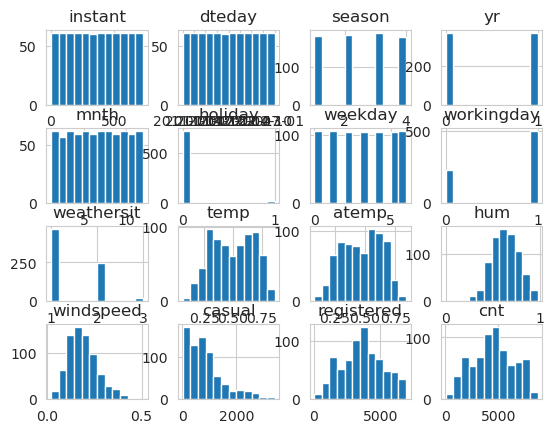

In [25]:
day_df.hist(bins=12)

Melihat distribusi data dari hour_df

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

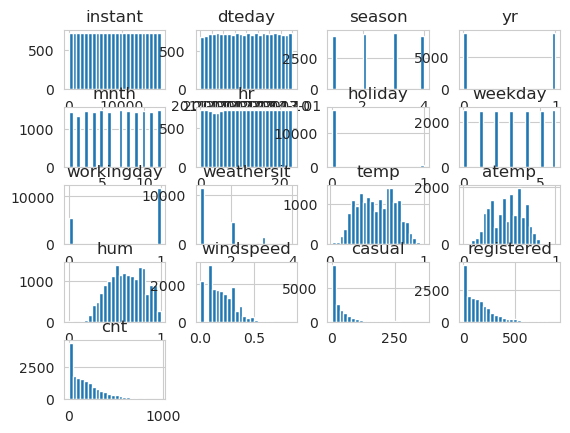

In [26]:
hour_df.hist(bins=24)

Menghitung nilai skewness dari data pada day_df

In [66]:
day_columns = day_df.drop(columns=["dteday"]).columns


def calculate_skew(data, columns):
    for col in columns:
        temp_series = pd.Series(np.array(data[col]))
        print(f"{col}: {temp_series.skew()}")


calculate_skew(day_df, day_columns)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


Menghitung nilai skewness dari data pada hour_df

In [67]:
hour_columns = hour_df.drop(columns=["dteday"]).columns

calculate_skew(hour_df, hour_columns)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


Melihat korelasi antar fitu pada day_df

In [395]:
day_df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,44591.000000,96.693151,91.500000,362.058904,0.569863,-0.006849,-0.426027,-2.471233,5.820548,5.252561,0.492488,-1.843008,39909.582192,2.173278e+05,2.572374e+05
season,96.693151,1.233892,-0.001025,3.188082,-0.001956,-0.006859,0.006452,0.011628,0.067978,0.062067,0.032504,-0.019717,160.472522,7.134020e+02,8.738745e+02
yr,91.500000,-0.001025,0.250342,-0.003096,0.000665,-0.005478,-0.000468,-0.013284,0.004360,0.003759,-0.007885,-0.000458,85.386865,4.639067e+02,5.492936e+02
mnth,362.058904,3.188082,-0.003096,11.915702,0.011073,0.065808,-0.009477,0.081873,0.139142,0.127952,0.109247,-0.055510,291.543755,1.580687e+03,1.872231e+03
holiday,0.569863,-0.001956,0.000665,0.011073,0.027941,-0.034168,-0.019677,-0.003154,-0.000874,-0.000885,-0.000379,0.000082,6.229170,-2.836112e+01,-2.213195e+01
weekday,-0.006849,-0.006859,-0.005478,0.065808,-0.034168,4.019171,0.033381,0.033960,-0.000062,-0.002462,-0.014914,0.002219,82.485415,1.794443e+02,2.619297e+02
workingday,-0.426027,0.006452,-0.000468,-0.009477,-0.019677,0.033381,0.216442,0.015514,0.004485,0.003956,0.001612,-0.000678,-165.483884,2.206011e+02,5.511723e+01
weathersit,-2.471233,0.011628,-0.013284,0.081873,-0.003154,0.033960,0.015514,0.296910,-0.012029,-0.010796,0.045870,0.001668,-92.543836,-2.213751e+02,-3.139189e+02
temp,5.820548,0.067978,0.004360,0.139142,-0.000874,-0.000062,0.004485,-0.012029,0.033508,0.029583,0.003310,-0.002241,68.283781,1.542309e+02,2.225147e+02
atemp,5.252561,0.062067,0.003759,0.127952,-0.000885,-0.002462,0.003956,-0.010796,0.029583,0.026556,0.003249,-0.002319,60.854436,1.383669e+02,1.992213e+02


Melihat korelasi antar fitur pada hour_df

In [397]:
hour_df.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,2.517058e+07,2243.844056,2172.443031,8439.269248,-165.637242,12.348199,13.653700,-7.975601,-45.541259,131.556090,118.648235,9.269692,-45.729734,39156.708942,214175.400794,253332.109736
season,2.243844e+03,1.225268,-0.005946,3.160817,-0.046817,-0.001774,-0.005185,0.007080,-0.010279,0.066506,0.060754,0.032167,-0.020282,6.560463,29.189784,35.750248
yr,2.172443e+03,-0.005946,0.250008,-0.018007,-0.013369,0.000559,-0.004498,-0.000511,-0.006124,0.003939,0.003370,-0.008059,-0.000535,3.519905,19.198785,22.718690
mnth,8.439269e+03,3.160817,-0.018007,11.825178,-0.137239,0.010595,0.071733,-0.005565,0.011871,0.133551,0.122975,0.109078,-0.056957,11.606863,63.641093,75.247956
hr,-1.656372e+02,-0.046817,-0.013369,-0.137239,47.808998,0.000554,-0.048509,0.007354,-0.089311,0.183207,0.158927,-0.368847,0.116102,102.684174,391.555310,494.239483
holiday,1.234820e+01,-0.001774,0.000559,0.010595,0.000554,0.027944,-0.034230,-0.019643,-0.001821,-0.000880,-0.000890,-0.000341,0.000082,0.260150,-1.197919,-0.937769
weekday,1.365370e+01,-0.005185,-0.004498,0.071733,-0.048509,-0.034230,4.023119,0.033566,0.004246,-0.000693,-0.003041,-0.014379,0.002822,3.235972,6.550791,9.786763
workingday,-7.975601e+00,0.007080,-0.000511,-0.005565,0.007354,-0.019643,0.033566,0.216626,0.013293,0.004964,0.004373,0.001409,-0.000674,-6.906050,9.462757,2.556708
weathersit,-4.554126e+01,-0.010279,-0.006124,0.011871,-0.089311,-0.001821,0.004246,0.013293,0.408777,-0.012636,-0.011599,0.051577,0.002051,-4.811367,-11.705993,-16.517360
temp,1.315561e+02,0.066506,0.003939,0.133551,0.183207,-0.000880,-0.000693,0.004964,-0.012636,0.037078,0.032683,-0.002596,-0.000545,4.363584,9.774015,14.137600


Menghitung nilai kovarian untuk mengetahui korelasi antar fitur pada day_df

In [27]:
day_df.cov(numeric_only=True)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,44591.000000,96.693151,91.500000,362.058904,0.569863,-0.006849,-0.426027,-2.471233,5.820548,5.252561,0.492488,-1.843008,39909.582192,2.173278e+05,2.572374e+05
season,96.693151,1.233892,-0.001025,3.188082,-0.001956,-0.006859,0.006452,0.011628,0.067978,0.062067,0.032504,-0.019717,160.472522,7.134020e+02,8.738745e+02
yr,91.500000,-0.001025,0.250342,-0.003096,0.000665,-0.005478,-0.000468,-0.013284,0.004360,0.003759,-0.007885,-0.000458,85.386865,4.639067e+02,5.492936e+02
mnth,362.058904,3.188082,-0.003096,11.915702,0.011073,0.065808,-0.009477,0.081873,0.139142,0.127952,0.109247,-0.055510,291.543755,1.580687e+03,1.872231e+03
holiday,0.569863,-0.001956,0.000665,0.011073,0.027941,-0.034168,-0.019677,-0.003154,-0.000874,-0.000885,-0.000379,0.000082,6.229170,-2.836112e+01,-2.213195e+01
weekday,-0.006849,-0.006859,-0.005478,0.065808,-0.034168,4.019171,0.033381,0.033960,-0.000062,-0.002462,-0.014914,0.002219,82.485415,1.794443e+02,2.619297e+02
workingday,-0.426027,0.006452,-0.000468,-0.009477,-0.019677,0.033381,0.216442,0.015514,0.004485,0.003956,0.001612,-0.000678,-165.483884,2.206011e+02,5.511723e+01
weathersit,-2.471233,0.011628,-0.013284,0.081873,-0.003154,0.033960,0.015514,0.296910,-0.012029,-0.010796,0.045870,0.001668,-92.543836,-2.213751e+02,-3.139189e+02
temp,5.820548,0.067978,0.004360,0.139142,-0.000874,-0.000062,0.004485,-0.012029,0.033508,0.029583,0.003310,-0.002241,68.283781,1.542309e+02,2.225147e+02
atemp,5.252561,0.062067,0.003759,0.127952,-0.000885,-0.002462,0.003956,-0.010796,0.029583,0.026556,0.003249,-0.002319,60.854436,1.383669e+02,1.992213e+02


Menghitung nilai kovarian untuk mengetahui korelasi antar fitur pada hour_df

In [28]:
hour_df.cov(numeric_only=True)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,2.517058e+07,2243.844056,2172.443031,8439.269248,-165.637242,12.348199,13.653700,-7.975601,-45.541259,131.556090,118.648235,9.269692,-45.729734,39156.708942,214175.400794,253332.109736
season,2.243844e+03,1.225268,-0.005946,3.160817,-0.046817,-0.001774,-0.005185,0.007080,-0.010279,0.066506,0.060754,0.032167,-0.020282,6.560463,29.189784,35.750248
yr,2.172443e+03,-0.005946,0.250008,-0.018007,-0.013369,0.000559,-0.004498,-0.000511,-0.006124,0.003939,0.003370,-0.008059,-0.000535,3.519905,19.198785,22.718690
mnth,8.439269e+03,3.160817,-0.018007,11.825178,-0.137239,0.010595,0.071733,-0.005565,0.011871,0.133551,0.122975,0.109078,-0.056957,11.606863,63.641093,75.247956
hr,-1.656372e+02,-0.046817,-0.013369,-0.137239,47.808998,0.000554,-0.048509,0.007354,-0.089311,0.183207,0.158927,-0.368847,0.116102,102.684174,391.555310,494.239483
holiday,1.234820e+01,-0.001774,0.000559,0.010595,0.000554,0.027944,-0.034230,-0.019643,-0.001821,-0.000880,-0.000890,-0.000341,0.000082,0.260150,-1.197919,-0.937769
weekday,1.365370e+01,-0.005185,-0.004498,0.071733,-0.048509,-0.034230,4.023119,0.033566,0.004246,-0.000693,-0.003041,-0.014379,0.002822,3.235972,6.550791,9.786763
workingday,-7.975601e+00,0.007080,-0.000511,-0.005565,0.007354,-0.019643,0.033566,0.216626,0.013293,0.004964,0.004373,0.001409,-0.000674,-6.906050,9.462757,2.556708
weathersit,-4.554126e+01,-0.010279,-0.006124,0.011871,-0.089311,-0.001821,0.004246,0.013293,0.408777,-0.012636,-0.011599,0.051577,0.002051,-4.811367,-11.705993,-16.517360
temp,1.315561e+02,0.066506,0.003939,0.133551,0.183207,-0.000880,-0.000693,0.004964,-0.012636,0.037078,0.032683,-0.002596,-0.000545,4.363584,9.774015,14.137600


Melakukan grouping pada data day_df untuk mengetahui jumlah peminjam sepeda berdasarkan musim

In [35]:
day_df.groupby(by="season").agg({
    "cnt": "sum"
})

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


Melakukan grouping pada day_df untuk mengetahui jumlah peminjam sepeda berdasarkan tahun dan musim

In [44]:
day_df.groupby(by=["yr", "season"])["cnt"].sum()

yr  season
0   1         150000
    2         347316
    3         419650
    4         326137
1   1         321348
    2         571273
    3         641479
    4         515476
Name: cnt, dtype: int64


Melakukan grouping pada day_df untuk mengetahui jumlah peminjam sepeda berdasarkan tahun dan bulan

In [47]:
day_df.groupby(by=["yr", "mnth"])["cnt"].sum()

yr  mnth
0   1        38189
    2        48215
    3        64045
    4        94870
    5       135821
    6       143512
    7       141341
    8       136691
    9       127418
    10      123511
    11      102167
    12       87323
1   1        96744
    2       103137
    3       164875
    4       174224
    5       195865
    6       202830
    7       203607
    8       214503
    9       218573
    10      198841
    11      152664
    12      123713
Name: cnt, dtype: int64


Melakukan grouping untuk mengetahui jumlah peminjam sepeda berdasarkan apakah hari tersebut hari kerja atau bukan (workingday)

In [48]:
workday_df = day_df.groupby(by="workingday")["cnt"].sum()
print(workday_df)

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


Melakukan grouping untuk mengetahui jumlah peminjam sepeda berdasarkan apakah hari tersebut hari libur atau bukan (holiday)

In [49]:
holiday_df = day_df.groupby(by="holiday")["cnt"].sum()
print(holiday_df)

holiday
0    3214244
1      78435
Name: cnt, dtype: int64


Menghitung jumlah peminjam sepeda pada akhir pekan

In [50]:
weekend_count = workday_df[0] - holiday_df[1]
print(f"Total penyewa sepeda di weekend: {weekend_count}")

Total penyewa sepeda di weekend: 921834


Melakukan grouping untuk menghitung jumlah peminjam sepeda berdasarkan kondisi cuaca pada day_df

In [53]:
day_df.groupby(by="weathersit")["cnt"].sum()

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64


Melakukan grouping untuk menghitung jumlah peminjam sepeda berdasarkan kondisi cuaca pada hour_df

In [56]:
hour_df.groupby(by="weathersit")["cnt"].sum()

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64


Melakukan grouping untuk menghitung jumlah peminjam kasual berdasarkan tahun

In [63]:
day_df.groupby(by="yr")["casual"].sum()

yr
0    247252
1    372765
Name: casual, dtype: int64


Melakukan grouping untuk menghitung jumlah peminjam yang terdaftar berdasarkan tahun

In [65]:
day_df.groupby(by="yr")["registered"].sum()

yr
0     995851
1    1676811
Name: registered, dtype: int64


Menghitung total penyewa sepeda kasual

In [66]:
casual_count = day_df["casual"].sum()
print(f"Jumlah penyewa sepeda casual: {casual_count}")

Jumlah penyewa sepeda casual: 620017


Menghitung total penyewa sepeda yang terdaftar

In [67]:
registered_count = day_df["registered"].sum()
print(f"Jumlah penyewa sepeda yang terdaftar: {registered_count}")

Jumlah penyewa sepeda yang terdaftar: 2672662


Melakukan grouping untuk menghitung jumlah peminjam sepeda kasual berdasarkan tahun dan musim

In [69]:
casual_df = day_df.groupby(by=["yr", "season"])["casual"].sum()
print(casual_df)

yr  season
0   1          21425
    2          77564
    3          95450
    4          52813
1   1          39197
    2         125958
    3         130641
    4          76969
Name: casual, dtype: int64


Melakukan grouping untuk menghitung jumlah peminjam sepeda yang terdaftar berdasarkan tahun dan musim

In [71]:
registered_df = day_df.groupby(by=["yr", "season"])["registered"].sum()
print(registered_df)

yr  season
0   1         128575
    2         269752
    3         324200
    4         273324
1   1         282151
    2         445315
    3         510838
    4         438507
Name: registered, dtype: int64


Melakukan grouping untuk menghitung jumlah peminjam sepeda kasual dan terdaftar berdasarkan tahun dan musim

In [73]:
users_df = day_df.groupby(by=["yr", "season"]).agg({
    "casual": "sum",
    "registered": "sum"
})

user_count_per_season = users_df["casual"] + users_df["registered"]

users_df["count"] = user_count_per_season

print(users_df)

           casual  registered   count
yr season                            
0  1        21425      128575  150000
   2        77564      269752  347316
   3        95450      324200  419650
   4        52813      273324  326137
1  1        39197      282151  321348
   2       125958      445315  571273
   3       130641      510838  641479
   4        76969      438507  515476


Melakukan grouping untuk menghitung jumlah peminjam sepeda berdasarkan hari

In [85]:
day_df.groupby(by="weekday")["cnt"].sum()

yr  mnth  weekday
0   1     0           4909
          1           6587
          2           5493
          3           4918
          4           5370
                     ...  
1   12    2          18677
          3          16756
          4          17149
          5          17337
          6          18910
Name: cnt, Length: 168, dtype: int64

Melakukan grouping untuk menghitung jumlah peminjam sepeda berdasarkan bulan dan hari

In [78]:
cnt__sum = day_df.groupby(by=["mnth", "weekday"])["cnt"].sum()

mnth  weekday
1     0          18159
      1          19268
      2          23110
      3          17109
      4          20106
                 ...  
12    2          29706
      3          26163
      4          33398
      5          33682
      6          31949
Name: cnt, Length: 84, dtype: int64


Melakukan grouping untuk menghitung jumlah peminjam sepeda berdasarkan tahun, bulan dan hari

In [79]:
day_df.groupby(by=["yr", "mnth", "weekday"])["cnt"].sum()

yr  mnth  weekday
0   1     0           4909
          1           6587
          2           5493
          3           4918
          4           5370
                     ...  
1   12    2          18677
          3          16756
          4          17149
          5          17337
          6          18910
Name: cnt, Length: 168, dtype: int64


Melakukan grouping untuk menghitung jumlah peminjam sepeda berdasarkan tahun dan hari

In [81]:
day_df.groupby(by=["yr", "weekday"])["cnt"].sum()

yr  weekday
0   0          177074
    1          180221
    2          180338
    3          169169
    4          174552
    5          182006
    6          179743
1   0          266953
    1          275282
    2          288771
    3          303879
    4          310843
    5          305784
    6          298064
Name: cnt, dtype: int64


Melakukan grouping untuk menghitung jumlah peminjam sepeda berdasarkan musim dan hari

In [87]:
day_df.groupby(by=["season", "weekday"])["cnt"].sum()

season  weekday
1       0           60195
        1           63771
        2           69813
        3           65277
        4           72355
        5           74264
        6           65673
2       0          129650
        1          123255
        2          125449
        3          130547
        4          135207
        5          135792
        6          138689
3       0          138431
        1          146307
        2          152715
        3          158054
        4          159561
        5          155267
        6          150794
4       0          115751
        1          122170
        2          121132
        3          119170
        4          118272
        5          122467
        6          122651
Name: cnt, dtype: int64


Melakukan grouping untuk menghitung jumlah peminjam sepeda berdasarkan jam

In [89]:
hour_df.groupby(by="hr")["cnt"].sum()

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


Membuat kolom baru yang berisi label waktu berdasarkan rentang jam

In [90]:
def check_time_of_day(time):
    if time == 0:
        return "midnight"
    elif 0 < time < 4:
        return "late night"
    elif 4 <= time < 12:
        return "morning"
    elif 12 <= time < 13:
        return "noon"
    elif 13 <= time < 18:
        return "afternoon"
    elif 18 <= time < 20:
        return "evening"
    elif time >= 20:
        return "night"
    else:
        return ""

hour_df["time_of_day"] = hour_df["hr"].apply(check_time_of_day)

hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_of_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,midnight
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,late night
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,late night
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,late night
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,evening
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,night
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,night
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,night


Melakukan grouping untuk menghitung jumlah peminjam sepeda berdasarkan waktu

In [92]:
hour_df.groupby(by="time_of_day")["cnt"].sum()

time_of_day
afternoon     1108328
evening        536561
late night      48690
midnight        39130
morning        926008
night          449548
noon           184414
Name: cnt, dtype: int64


**Insight:**
- Pada data penyewaan sepeda harian untuk kolom season, yr, mnth, workingday, temp, atemp, hum, dan cnt cenderung memiliki distribusi left-skewed
- Pada data penyewaan sepeda harian untuk kolom holiday, weathrsit, windspeed, casual, dan registered cenderung memiliki distribusi right-skewed
- Pada data penyewaan perjam untuk kolom season, yr, mnth, hr, weekday, working day, temp, atemp, dan hum cenderung memiliki distribusi left-skewed
- Pada data penyewaan perjam untuk kolom holiday, weathersit, windspeed, casual, registered, dan cnt cenderung memiliki distribusi right-skewed
- Pada kedua dataset untuk kolom instant memiliki distribusi symmetric
- Jumlah peminjam sepeda terbanyak berdasarkan musim di tahun 2011 dan 2012 jatuh pada musim gugur dan terendah pada musim semi
- Jumlah peminjam sepeda terbanyak terjadi pada hari kerja
- Orang - orang lebih suka meminjam sepeda saat cuaca cerah, sedikit awan atau awan sebagian dan sangat sedikit saat hujan deras
- Jumlah penyewa sepeda yang terdaftar dalam sistem lebih banyak dari penyewa kasual
- Jumlah peminjam sepeda paling banyak pada waktu sore hari

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda dari tahun 2011 hingga 2012?

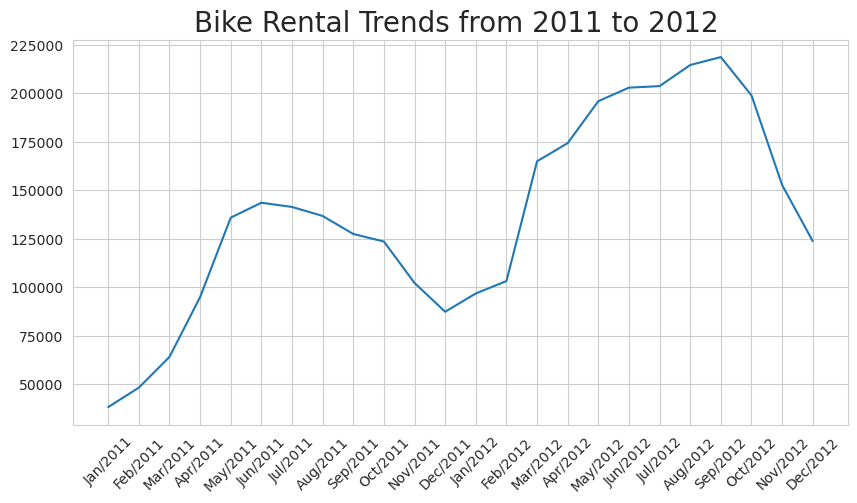

In [101]:
# Melakukan grouping
sharing_bike_trend_df = day_df.groupby(by=["yr", "mnth"])["cnt"].sum().reset_index()

# Mengubah indeks tahun menjadi bentuk sebenarnya
sharing_bike_trend_df["yr"] = sharing_bike_trend_df["yr"].apply(lambda x: 2011 if x == 0 else 2012)

# Mengubah bulan dalam bentuk teks
sharing_bike_trend_df["mnth"] = sharing_bike_trend_df["mnth"].apply(lambda x: calendar.month_abbr[x])

# Membuat kolom baru dari kolom tahun dan bulan
sharing_bike_trend_df["year_month"] = sharing_bike_trend_df["mnth"].astype(str) + "/" + sharing_bike_trend_df[
    "yr"].astype(str)

# Membuang kolom yr dan mnth
sharing_bike_trend_df.drop(columns=["yr", "mnth"], inplace=True)

# Melakukan plotting untuk melihat tren peminjaman sepeda
plt.figure(figsize=(10, 5))
plt.plot(sharing_bike_trend_df["year_month"], sharing_bike_trend_df["cnt"])
plt.title("Bike Rental Trends from 2011 to 2012 ", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()


### Pertanyaan 2: Apakah jumlah peminjam sepeda bertambah pada hari libur nasional atau akhir pekan dibandingkan dengan hari kerja?

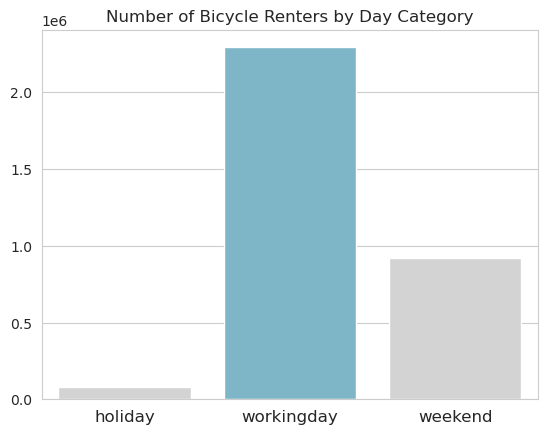

In [100]:
# Membuat dictionary yang menampung kategori hari
rental_total_by_day_category = {
    "day_category": ["holiday", "workingday", "weekend"]
}

# Membuat dataframe untuk menampung total penyewa sepeda berdasarkan kategori hari
bike_rental_totals = pd.DataFrame(data=rental_total_by_day_category)

# Mendapatkan total penyewa sepeda
rental_totals = day_df["cnt"].sum()

# Mendapatkan total penyewa sepeda di hari kerja
workingday_rental_totals = day_df.groupby(by="workingday")["cnt"].sum()[1]

# Mendapatkan total penyewa sepeda di hari libur
holiday_rental_totals = day_df.groupby(by="holiday")["cnt"].sum()[1]

# Mendapatkan total penyewa sepeda di akhir pekan
weekend_rental_totals = rental_totals - (workingday_rental_totals + holiday_rental_totals)

# Menambahkan kolom baru yaitu total
bike_rental_totals["total"] = [holiday_rental_totals, workingday_rental_totals, weekend_rental_totals]

colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3"]

sns.barplot(
    y="total",
    x="day_category",
    data=bike_rental_totals,
    palette=colors_,
    legend=False,
    hue='day_category'
)

plt.title("Number of Bicycle Renters by Day Category")
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana kondisi cuaca yang lebih disukai oleh pesepeda?

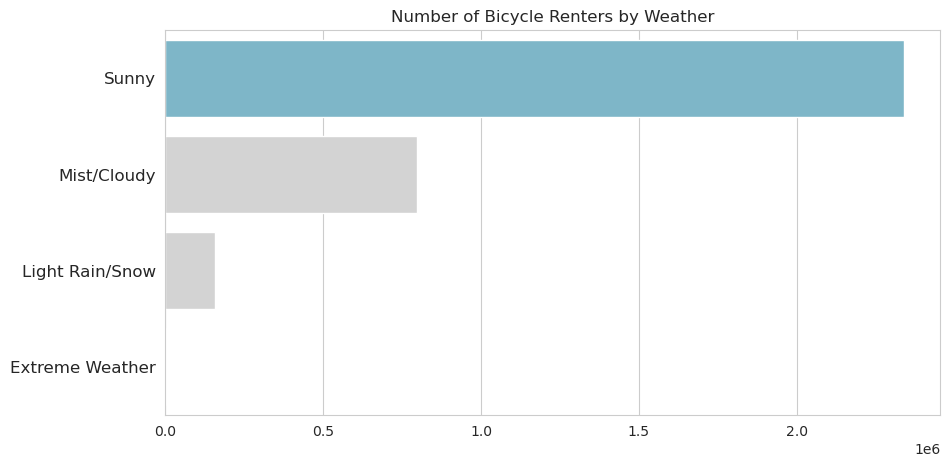

In [99]:
# Membuat list kondisi cuaca
weathers = ["Sunny", "Mist/Cloudy", "Light Rain/Snow", "Extreme Weather"]

# Mendapatkan jumlah penyewa sepeda berdasarkan kondisi cuaca
rental_totals_by_weather = hour_df.groupby(by="weathersit")["cnt"].sum().reset_index()

# Membuat dataframe jumlah penyewa sepeda berdasarkan cuaca
rental_totals_by_weather_df = pd.DataFrame(data=rental_totals_by_weather)

# Mengganti label cuaca dari numerik menjadi teks
rental_totals_by_weather_df["weathersit"] = rental_totals_by_weather["weathersit"].apply(lambda x: weathers[x - 1])

# Membuat list warna
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Melakukan bar plotting untuk melihat jumlah penyewa berdasarkan kondisi cuaca
plt.figure(figsize=(10, 5))
sns.barplot(
    x="cnt",
    y="weathersit",
    data=rental_totals_by_weather_df.sort_values(by="cnt", ascending=False),
    legend=False,
    palette=colors_,
    hue="weathersit"
)
plt.title("Number of Bicycle Renters by Weather")
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


### Pertanyaan 4: Apakah musim panas menjadi musim dengan jumlah peminjam sepeda terbanyak?

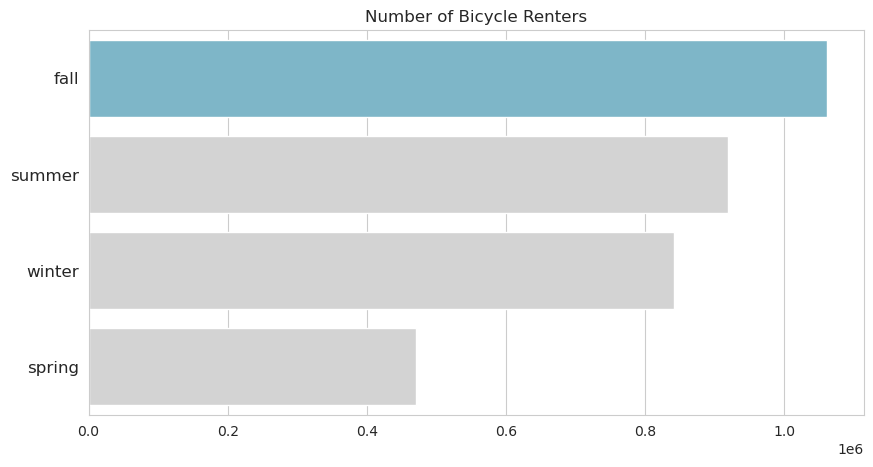

In [98]:
# Membuat list yang berisi musim
seasons = ["spring", "summer", "fall", "winter"]

# Melakukan grouping jumlah penyewa sepeda berdasakan musim
rental_totals_by_season = day_df.groupby(by="season")["cnt"].sum().reset_index()

# Mengubah label season dari numerik menjadi teks
rental_totals_by_season["season"] = rental_totals_by_season["season"].apply(lambda x: seasons[x - 1])

# Membuat list berisikan color
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Melakukan plotting untuk menampilkan jumlah penyewa sepeda berdasarkan musim
plt.figure(figsize=(10, 5))
sns.barplot(
    x="cnt",
    y="season",
    data=rental_totals_by_season.sort_values(by="cnt", ascending=False),
    legend=False,
    palette=colors_,
    hue="season"
)
plt.title("Number of Bicycle Renters")
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="y", labelsize=12)
plt.show()

### Pertanyaan 5: Apakah jumlah penyewa sepeda yang terdaftar lebih banyak dari penyewa kasual?

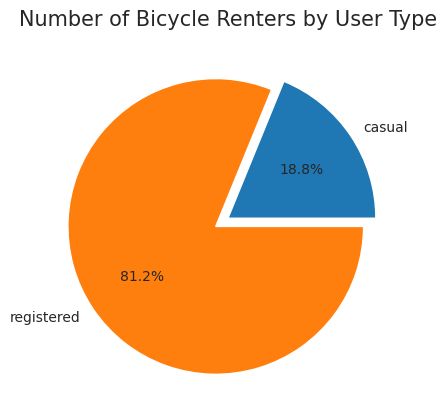

In [97]:
casual_total = day_df["casual"].sum()

registered_total = day_df["registered"].sum()

plt.pie(
    x=[casual_total, registered_total],
    labels=("casual", "registered"),
    autopct="%1.1f%%",
    explode=(0, 0.1)
)
plt.title("Number of Bicycle Renters by User Type", fontsize=15)
plt.show()

### Pertanyaan 6: Apakah sore hari merupakan waktu yang cocok untuk bersepeda?

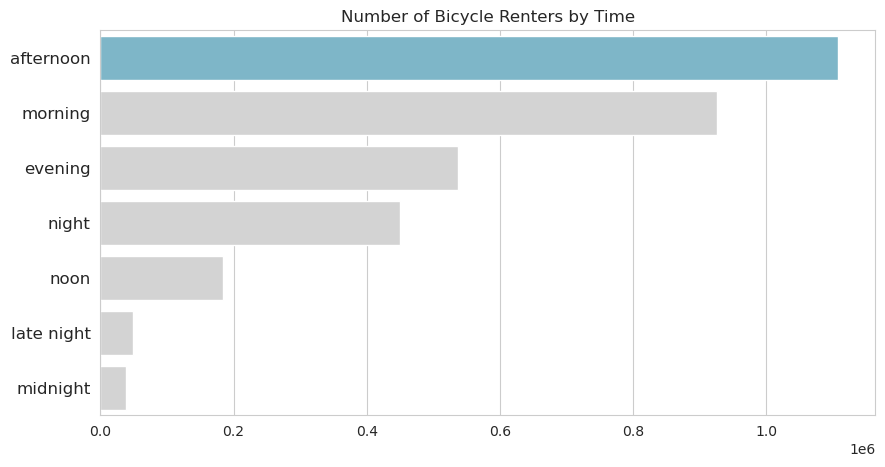

In [96]:
# Mendapatkan jumlah penyewa sepeda berdasarkan waktu
rental_total_by_time = hour_df.groupby(by="time_of_day")["cnt"].sum().reset_index()

# Membuat list warna
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Melakukan plotting jumlah penyewa sepeda berdasarkan waktu
plt.figure(figsize=(10, 5))
sns.barplot(
    x="cnt",
    y="time_of_day",
    data=rental_total_by_time.sort_values(by="cnt", ascending=False),
    legend=False,
    palette=colors_,
    hue="time_of_day"
)
plt.title("Number of Bicycle Renters by Time")
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="y", labelsize=12)
plt.show()

### Pertanyaan 7: Apakah kondisi suhu, kelembaban, kecepatan angin mempengaruhi jumlah peminjam sepeda?

<Axes: >

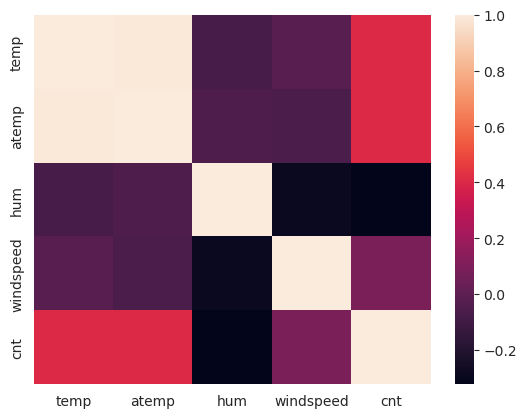

In [95]:
selected_columns = ["temp", "atemp","hum", "windspeed", "cnt"]

sns.heatmap(data=hour_df[selected_columns].corr())

**Insight:**
- Pertanyaan 1: Tren peminjaman sepeda dari tahun 2011 hingga 2012 mengalami peningkatan yang cukup siginfikan. Terlihat pada grafik, di awal tahun 2011 jumlah peminjam speeda kurang dari 50 ribu orang, dan puncaknya terjadi pada tahun 2012 mencapai lebih dari dua juta orang pada bulan September. Pada tahun 2011 sempat mengalami penuruan setelah bulan Mei, berlanjut hingga akhir tahun. Kemudian pada awal tahun 2012 mengalami sedikit peningkatan dan terus bertambah hingga puncaknya di bulan September.
- Pertanyaan 2: Jumlah peminjam sepeda sangat tinggi pada hari kerja dibandingkan dengan akhir pekan dan hari libur. Bahkan pada hari libur (holiday) sangat sedikit yang meminjam sepeda, kemungkinan orang-orang memanfaatkan hari libur hanya untuk beristirahat di rumah.
- Pertanyaan 3: Dari grafik, cuaca cerah sepertinya menjadi waktu yang cocok untuk bersepeda. Jumlah peminjam sepeda sangat banyak dibandingkan pada saat mendung, hujan ringan, dan cuaca buruk. Sangat sedikit sekali peminjam sepeda pada saat cuaca ekstrem, dikarenakan kondisi langit serta jalan yang tidak memungkinkan untuk bersepda.
- Pertanyaan 4: Musim gugur merupakan musim dengan peminjam sepeda terbanyak dibandingkan musim semi, dingin, dan panas. Musim semi merupakan musim dengan peminjam sepeda paling sedikit
- Pertanyaan 5: Sebagian besar peminjam sepeda merupakan peminjam terdaftar yaitu sebesar 81.2% dibandingkan kasual hanya 18.8%.
- Pertanyaan 6: Setelah tengah hari merupakan waktu dengan peminjam sepeda terbanyak. Diikuti dengan waktu pagi, petang, malam, tengah hari, dini hari, dan tengah malam. Tengah malam adalah waktu paling sedikit peminjam sepeda. Pada pagi hari cukup banyak peminjam sepeda, tetapi pada saat tengah hari jumlahnya menurun banyak. Sepertinya, saat tengah hari di mana matahari tepat di atas kepala waktu yang tidak cocok untuk bersepeda karena suhunya cukup panas.
- Pertanyaan 7: Dari grafik terlihat korelasi antara jumlah peminjam sepeda dengan keadaan suhu, kelembaban, dan kecepatan angin. Berikut ini penjelasannya:
    - Jumlah peminjam dengan keadaan suhu memiliki korelasi positif/bersesuaian
    - Jumlah peminjam dengan kelembaban memiliki korelasi negatif/berlawanan
    - Jumlah peminjam dengan kecepatan angin memiliki korelasi hampir mendekati 0 bisa dipastikan keduanya memiliki korelasi yang lemah

## Analisis Lanjutan (Opsional)

### Pertanyaan 8: Bagaimana aktivitas harian peminjaman sepeda dari tahun 2011 hingga 2012?

In [93]:
# Membuat list berisi aktivitas harian
rental_activities = ["quiet", "moderate", "busy"]

# Melakukan binning dengan membagi 3 cluster
cluster =  pd.cut(day_df["cnt"], 3, labels=rental_activities, ordered=True)

# Membuat dataframe
rental_daily_df = pd.DataFrame(data=day_df)
rental_daily_df["activity"] = cluster

rental_daily_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,activity
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,quiet
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,quiet
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,quiet
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,quiet
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,quiet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,quiet
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,moderate
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,quiet
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,quiet


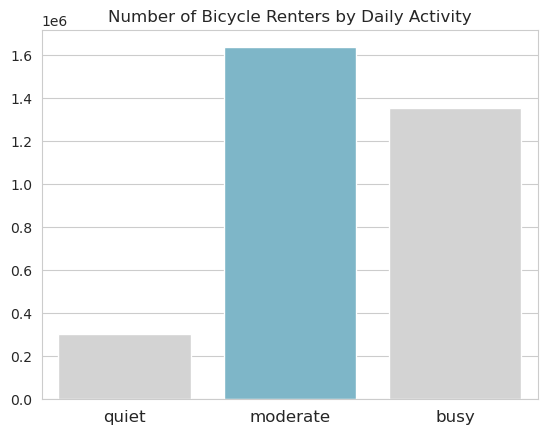

In [94]:
# Mendapatkan jumlah peminjam sepeda berdasarkan aktivitas harian
rental_total_by_activity = rental_daily_df.groupby(by="activity", observed=True)["cnt"].sum().reset_index()

# Membuat list warna
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3"]

# Melakukan plotting untuk memvisualisasikan aktivitas harian
sns.barplot(
    y="cnt",
    x="activity",
    data=rental_total_by_activity,
    palette=colors_,
    legend=False,
    hue="activity"
)

plt.title("Number of Bicycle Renters by Daily Activity")
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

**Insight:**
- Dari analisis lanjutan ini dilakukan pengelompokan jumlah peminjam sepeda pada 3 cluster berdasarkan aktivitas harian (sepi, sedang, dan ramai)
- Rata-rata aktivitas harian jumlah peminjam sepeda adalah sedang/moderate (tidak terlalu ramai dan tidak terlalu sepi)

## Conclusion

- Conclusion pertanyaan 1: Tren peminjaman sepeda dari tahun 2011 hingga 2012 mengalami peningkatan yang cukup signifikan dan puncaknya pada bulan September 2012 mencapai dua juta orang.
- Conclusion pertanyaan 2: Hari kerja adalah waktu dengan jumlah peminjam sepeda terbanyak dan hari libur (holiday) yang paling sedikit.
- Conclusion pertanyaan 3: Cuaca cerah merupakan waktu yang cocok untuk bersepeda
- Conclusion pertanyaan 4: Musim gugur merupakan musim dengan jumlah peminjam sepeda terbanyak dan musim semi yang paling sedikit.
- Conclusion pertanyaan 5: Sebagian besar peminjam sepeda adalah pengguna terdaftar.
- Conclusion pertanyaan 6: Waktu yang cocok untuk bersepeda adalah sore hari.
- Conclusion pertanyaan 7: Jumlah peminjam memiliki korelasi yang tinggi dengan suhu dan korelasi lemah dengan kecepatan angin
- Conclusion pertanyaan 8: Rata-rata aktivitas harian jumlah peminjam sepeda adalah tidak terlalu sepi dan tidak terlalu ramai (moderate)